# **USED CAR SALE PREDICTION**

# **INTRODUCTION**

**Overview**

Finding a good car can sometimes be a hustle especially for first time car owners. This can be attributed to the fact that it is very easy to get conned into buying a vehicle that does not serve your purpose for the period you intend to own the vehicle. It might also be equally hard to resell your vehicle once you are done with it and you may end up selling it at a throw away price.
It is equally hard for car dealers, especially second hand car dealers whose whole business is to buy and sell used cars as they face almost similar problems in selling second hand vehicles.
It is therefore really important to understand how the second hand car market works before committing to purchase the car of your dreams.


**Defining our question**

Create a model that predicts if a dealer will manage to sell a used car or not.



**Metrics for success**

* Visualising the relationships between the sold/unsld cars  and various  features such as age, cholesterol level, resting ecg results etc.
* Building a model that can determine whether a dealer will sell a used car or not.
* Identifying the top features influencing  whether a dealer will sell a used car or not.

**Understanding context**

A dealer may purchase a vehicle that is hard to resale which will adversely affect his business in terms of very low profits and sometimes losses which might end up putting him out of business.
It is therefore really important for second hand car dealers to understand which vehicles to purchase for resale to increase his profit margins.


**Recording experimental design**



*   Determine the main objectives
*Load and preview the dataset.
*Understand the data.
*Prepare the dataset - Identify outliers, anomalies, duplicates, missing *values, and determine how deal with them etc.
*Carry out univariate analysis, bivariate analysis, and modelling.
*Challenge the solution.
*Conclusion and recommendations




**Relevance of data**

Used Car Data



The dataset is from kaggle and can be accessed https://www.kaggle.com/datasets/shubham1kumar/usedcar-data. The data is from the USA Automobile industry for Indian used cars and it relevant for our analysis.
The dataset has 7906 rows and 17 columns.

The columns are:
* Sales_ID (Sales ID)
* name (Name of the used car)
* year (Year of the car purchase)
* selling_price (Current selling price for used car)
* km_driven (Total km driven)
* Region (Region where it is used)
* State or Province (State or Province where it is used)
* City (City where it is used)
* fuel (Fuel type)
* seller_type (Who is selling the car)
* transmission (Transmission type of the car)
* owner (Owner type)
* mileage (Mileage of the car)
* engine (engine power)
* max_power (max power)
* seats (Number of seats)
* sold (used car sold or not)






# **Term Explanations**

* Torque

Torque is a twisting force that speaks to the engine's rotational force and measures how much of that twisting force is available when an engine exerts itself

A high torque enables efficient and energy-saving driving. A high engine power enables a car to accelerate quickly and reach a high top speed.

# **DATA LOADING**

**Importing our libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# loading the data 
data = pd.read_csv('UserCarData.csv')

In [ ]:
# checking the dimensions of the data

data.shape
# the data has 18 columns and 7906 rows

(7906, 18)

 * The dataset has 18 columns and 7906 rows

In [ ]:
# previewing the first 2 rows 
data.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y


In [ ]:
# preview the last 2 rows
data.tail(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.0,140Nm@ 1800-3000rpm,5,N
7905,8128,Tata,2013,290000,25000,East,Maine,Augusta,Diesel,Individual,Manual,First_Owner,23.57,1396,70.0,140Nm@ 1800-3000rpm,5,N


In [ ]:
# checking the column names 
data.columns.to_list()

['Sales_ID',
 'name',
 'year',
 'selling_price',
 'km_driven',
 'Region',
 'State or Province',
 'City',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats',
 'sold']

In [ ]:
# checking the data types 
data.dtypes 
# the data is in integers, objects and floats 

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

* The data is in integers, objects and floats 

In [ ]:
# a brief description of the data 
data.describe()
# exponentials
# max_power and engine 

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


# **DATA CLEANING**

***Missing Values***

In [ ]:
# checking for missing values
data.isnull().sum()


Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

* There are no missing values in our dataset

***Duplicates***

In [ ]:
# checking for duplicated values 
data.duplicated().sum()
# there are no duplicated values 

0

* There are no duplicates in our data

***outliers***

In [ ]:
# checking for outliers 
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outlier = data[((data < (q1 - 1.5*iqr))|(data > (q3 + 1.5*iqr)))]
outlier.count()
# although there are outliers in some of the columns, I choose not to do anything to them, since they all make perfect sense in the data.

Sales_ID                0
name                    0
year                  165
selling_price         598
km_driven             194
Region                  0
State or Province       0
City                    0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage                24
engine               1183
max_power             564
torque                  0
seats                1652
sold                    0
dtype: int64

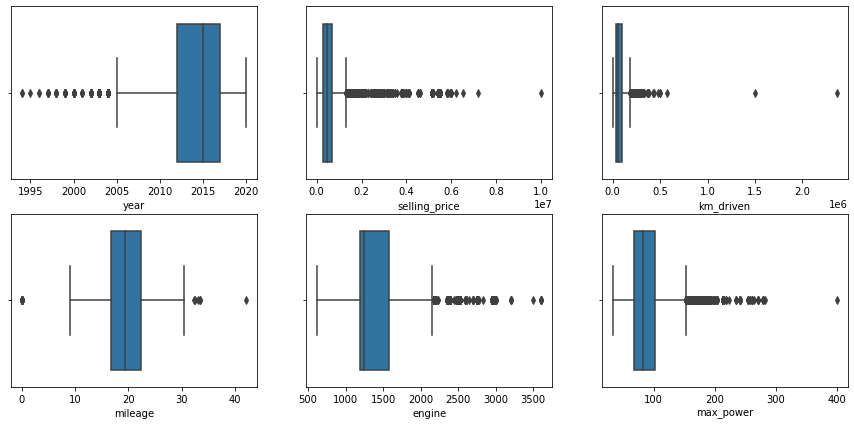

In [ ]:
# visualising the outliers 
types = data[['year','selling_price','km_driven','mileage','engine','max_power','seats']].columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,7))
for col, ax in zip(types, axes.flatten()):
  sns.boxplot(data[col], ax = ax);

There is a profusion of outliers in our dataset but we won't remove these outliers as most of which are likely due to natural variability in our data also we want to see how it will affect our model

# **EXPLORATORY DATA ANALYSIS**

* **Univariate analysis** 

***1.No of sold/unsold cars***

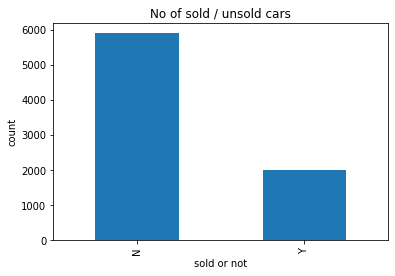

In [ ]:
# visulising if a vehicle is sold or not.

data['sold'].value_counts().plot(kind = 'bar');
plt.title('No of sold / unsold cars')
plt.xlabel('sold or not')
plt.ylabel('count')
plt.show()

# from this we can see that there is a large class imbalance.
# under-sampling of the 'no sale' or over-sampling of the 'yes sale' will have to be done before modelling.

* There are almost three times as much as unsold cars as compared to sold cars

***2.No of vehicle per feature***

In [ ]:
data[['Region','State or Province','City','fuel','seller_type','transmission','owner','seats','name']].nunique()

Region                  4
State or Province      49
City                 1310
fuel                    4
seller_type             3
transmission            2
owner                   5
seats                   9
name                   31
dtype: int64

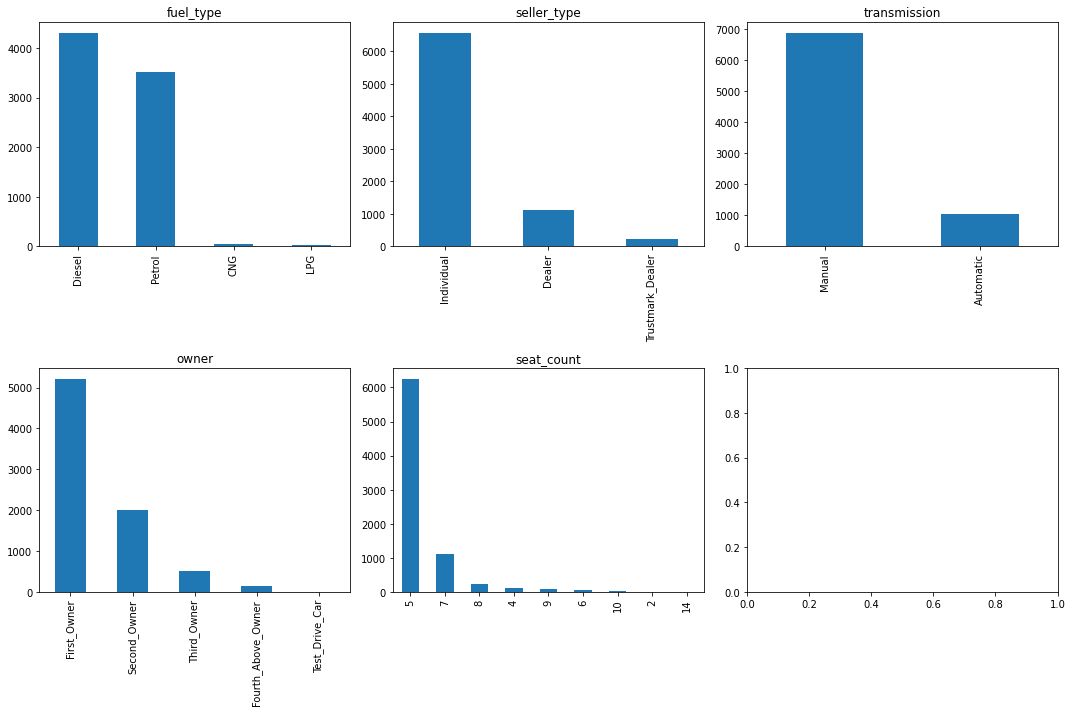

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
titles =['fuel_type', 'seller_type', 'transmission', 'owner', 'seat_count']
count=0
ilist = [0,1,2,0,1]
a=None
for col in cols:
   if count <=2:
     a=0
   else:
     a=1
   data[col].value_counts().plot.bar(ax=axes[a, ilist[count]])
   axes[a, ilist[count]].set_title(titles[count])
   count +=1
fig.tight_layout();



*  **Fuel_type**:    Diesel vehicles were more than other vehicles 
*  **Seller_type**:  Most vehicles were owned by individuals 
*  **Transmission**: Most vehicles were manual vehicles 
*  **Owner**:        Most vehicles were owned by first time owners
*  **Seat_count**:   Most vehicles had 5 seats 







**3.Brand Popularity**

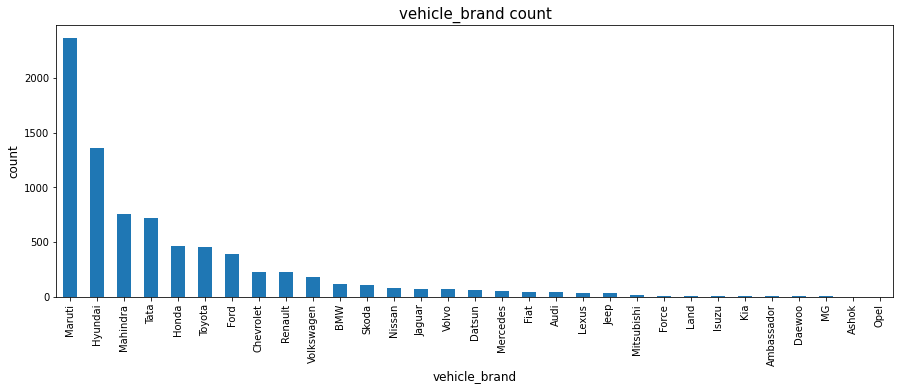

In [ ]:
# The most popular car brand/name 
fig, axes = plt.subplots(figsize = (15,5))
data['name'].value_counts().plot(kind = 'bar')
plt.title('vehicle_brand count', size = 15)
plt.xlabel('vehicle_brand', size = 12)
plt.ylabel('count', size = 12);
# The most popular car brand is maruti with the least popular being opel 

* The most popular car brand is maruti with the least popular being opel 

***4.Distribution***

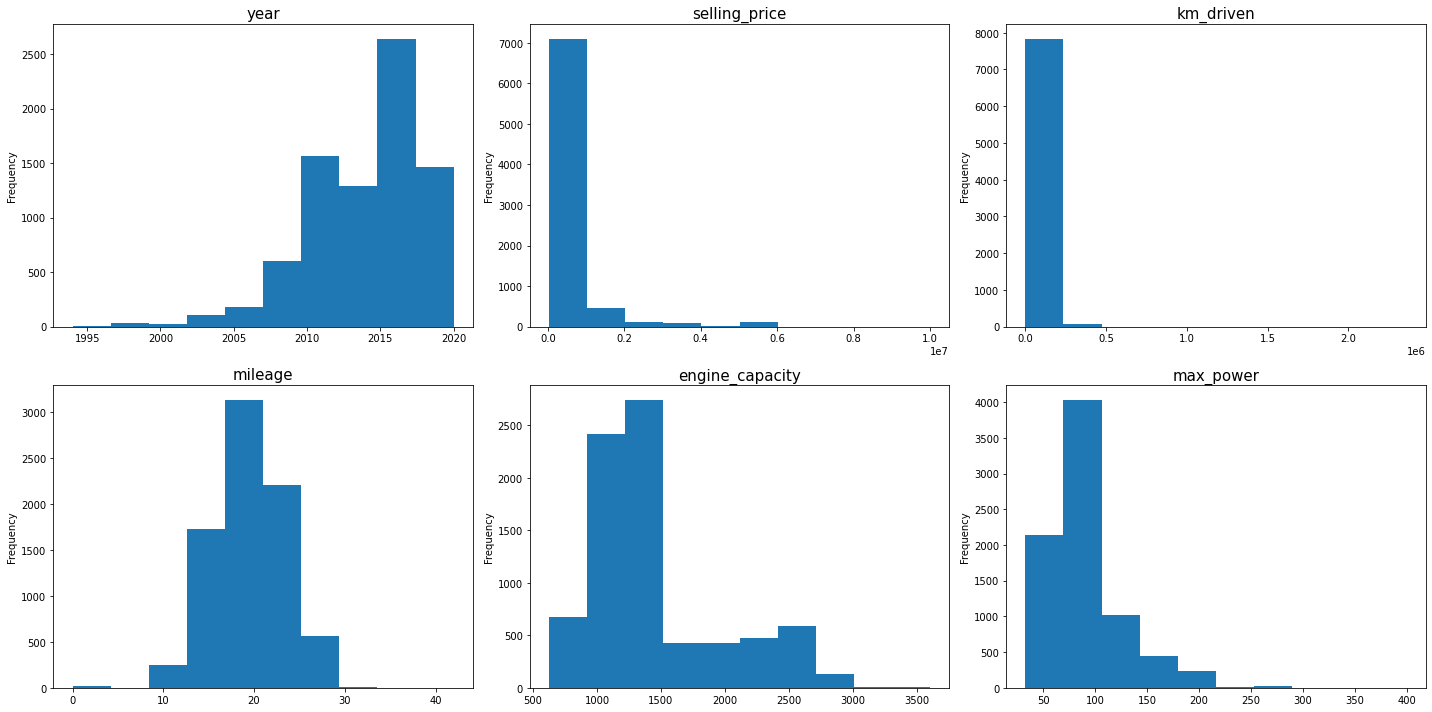

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))

data['year'].plot.hist(ax = axes[0,0])
axes[0,0].set_title('year', size = 15)
data['selling_price'].plot.hist(ax = axes[0,1])
axes[0,1].set_title('selling_price', size = 15)
data['km_driven'].plot.hist(ax = axes[0,2])
axes[0,2].set_title('km_driven', size = 15)
data['mileage'].plot.hist(ax = axes[1,0])
axes[1,0].set_title('mileage', size = 15)
data['engine'].plot.hist(ax = axes[1,1])
axes[1,1].set_title('engine_capacity', size = 15)
data['max_power'].plot.hist(ax = axes[1,2])
axes[1,2].set_title('max_power', size =15)
fig.tight_layout();

# kilometers driven and selling price. # limit the x-scale



1.   **Year**: Most vehicles were from the year 2010 to 2020
2.   **Mileage**: The mileage on most vehicles was between 15 and 25
3.   **Engine capacity**: The engine capacity on most vehicles was between 1000cc to 1500cc
4.   **max_power**:The maximum power on most vehicles was between 50 and 100 horsepower
5.   **Selling Price**: The selling price of most of the vehicles was between 0 and 0.2 million 
6.   **Kilometers_driven**: Most cars had been driver for between 0 and 0.25 million kilometers 



***5.Count per region***

In [ ]:
data['Region'].value_counts(normalize = True)
# central region had the highest count while the south region had the least count.

Central    0.300531
West       0.249937
East       0.245257
South      0.204275
Name: Region, dtype: float64

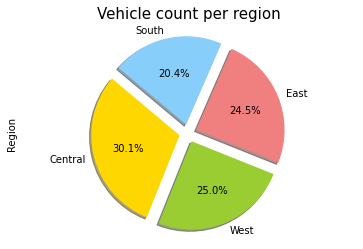

In [ ]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
data['Region'].value_counts().plot.pie(explode = (0.1, 0.1, 0.1, 0.1), autopct = '%1.1f%%', shadow= True, startangle=140, colors = colors);
plt.axis('equal')
plt.title('Vehicle count per region', size = 15);


In [ ]:
print(data['State or Province'].value_counts().head(3))
print('**************')
print(data['State or Province'].value_counts().tail(3))

# the state of California had the most number of vehicles dealt while the province of Wyoming had the least

California    901
Texas         499
New York      491
Name: State or Province, dtype: int64
**************
Rhode Island    17
Delaware        15
Wyoming         12
Name: State or Province, dtype: int64


* The state of California had the most number of vehicles dealt while the province of Wyoming had the least

**2)Bivariate Analysis**

***1.Sale per feature***

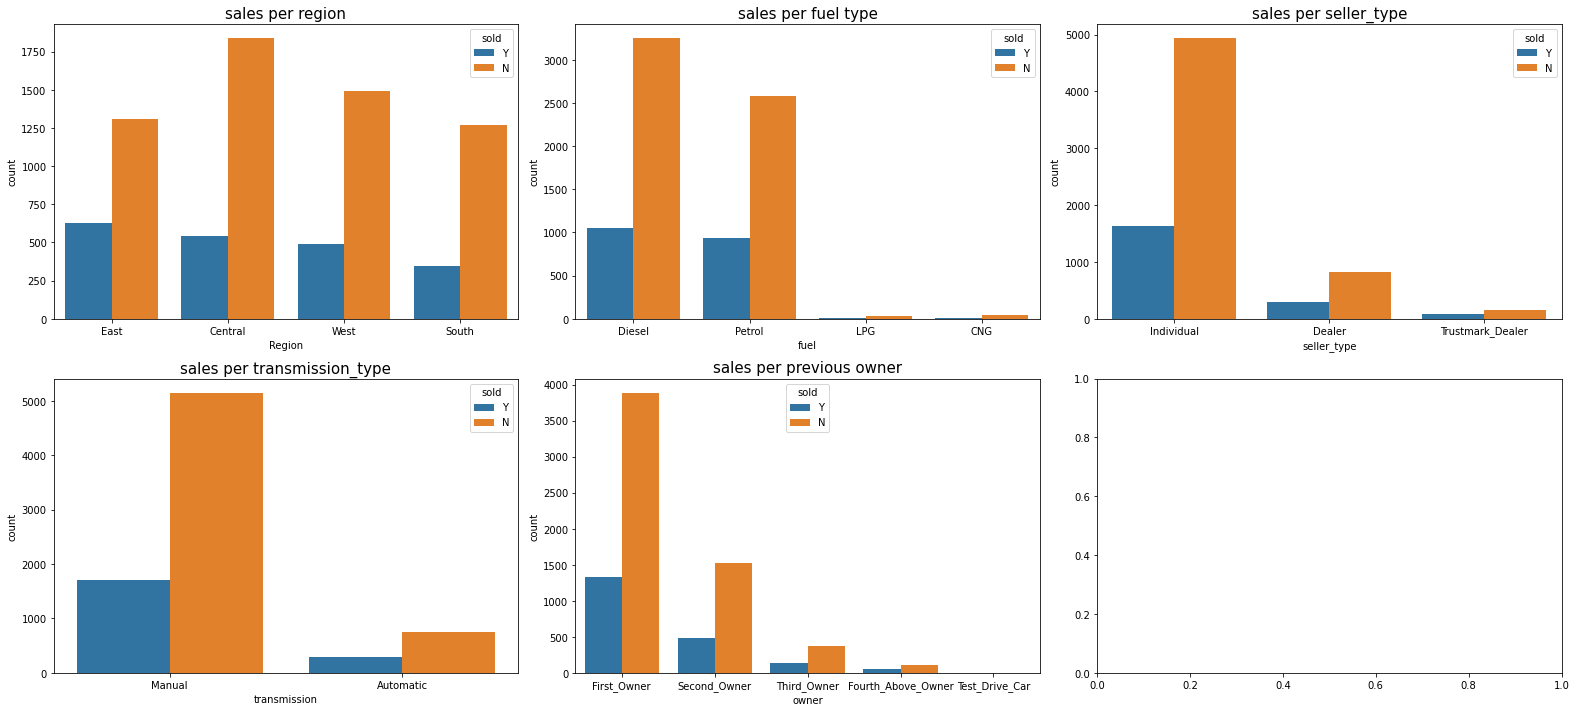

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize =(22,10))

sns.countplot(ax = axes[0,0], x = 'Region', hue = 'sold', data = data)
axes[0,0].set_title('sales per region', size = 15)
sns.countplot(ax = axes[0,1], x = 'fuel', hue = 'sold', data = data)
axes[0,1].set_title('sales per fuel type', size = 15)
sns.countplot(ax = axes[0,2], x ='seller_type', hue = 'sold', data = data)
axes[0,2].set_title('sales per seller_type', size = 15)
sns.countplot(ax = axes[1,0], x = 'transmission', hue = 'sold', data = data)
axes[1,0].set_title('sales per transmission_type', size = 15)
sns.countplot(ax = axes[1,1], x = 'owner', hue = 'sold', data = data)
axes[1,1].set_title('sales per previous owner', size = 15)
fig.tight_layout()



*  From all the charts we can see that cars that were not sold were the most.
*   The Eastern region had the highest count of cars both sold and not sold with cars not sold being the most 
*   Most vehicles were diesel vehicles and most of them were not sold 
*   Most vehicles were owned by individuals, also, most of them were not sold.
*   Most vehicles were vehicles with manual transmission and most of them were also not sold.
*  First time owners of vehicles were the most, but even with this, most of them did not sell their vehicles 



***2.Selling price against feature***

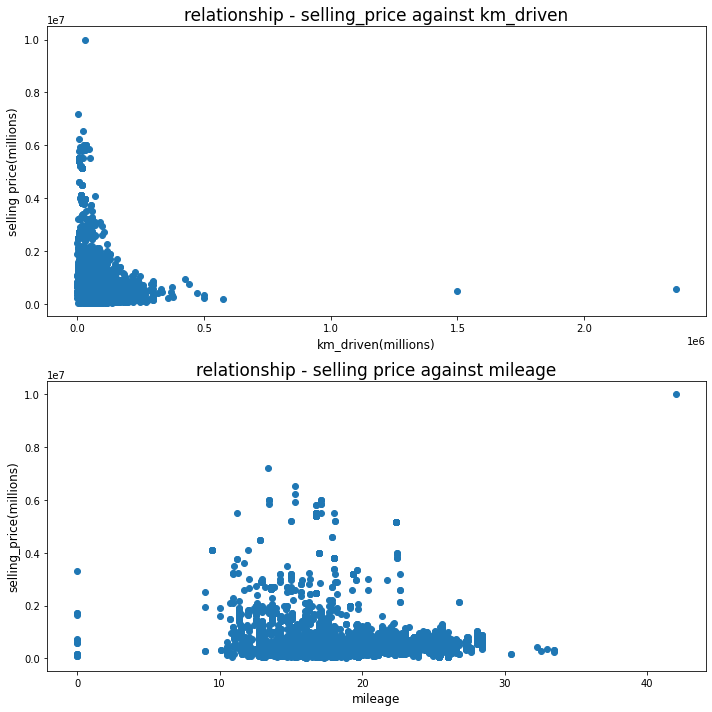

In [ ]:
fig, axes = plt.subplots(nrows = 2, figsize = (10,10))
axes[0].scatter(x = data['km_driven'], y = data['selling_price'])
axes[0].set_title('relationship - selling_price against km_driven',size = 17)
axes[0].set_xlabel('km_driven(millions)',size = 12)
axes[0].set_ylabel('selling price(millions)',size = 12)
axes[1].scatter(x = data['mileage'], y = data['selling_price'])
axes[1].set_title('relationship - selling price against mileage', size = 17)
axes[1].set_xlabel('mileage', size = 12)
axes[1].set_ylabel('selling_price(millions)', size = 12)
plt.tight_layout();



*   Most vehicles have travelled for few kilometers and have a low price as well.
*.   Most vehicles have a mileage of between 10-30 while the selling price is low as well 



***3) Feature against Engine size***

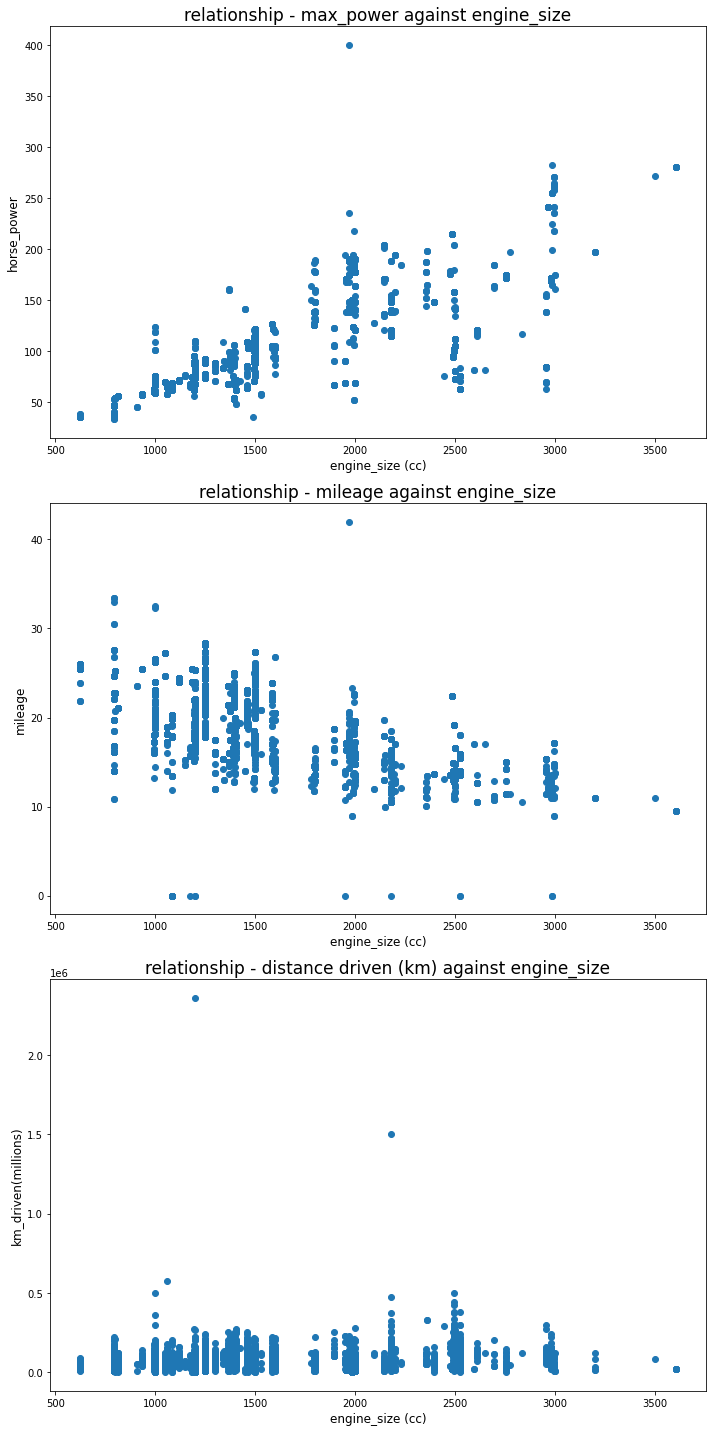

In [ ]:
# Engine_size vs horse_power
# Engine_size vs mileage
fig, axes = plt.subplots(nrows = 3, figsize = (10,20))
axes[0].scatter(x = data['engine'], y = data['max_power'])
axes[0].set_title('relationship - max_power against engine_size',size = 17)
axes[0].set_xlabel('engine_size (cc)',size = 12)
axes[0].set_ylabel('horse_power',size = 12)
axes[1].scatter(x = data['engine'], y = data['mileage'])
axes[1].set_title('relationship - mileage against engine_size', size = 17)
axes[1].set_xlabel('engine_size (cc)', size = 12)
axes[1].set_ylabel('mileage', size = 12)
axes[2].scatter(x = data['engine'], y = data['km_driven'])
axes[2].set_title('relationship - distance driven (km) against engine_size', size = 17)
axes[2].set_xlabel('engine_size (cc)', size = 12)
axes[2].set_ylabel('km_driven(millions)', size = 12)
plt.tight_layout();

* The more the engine size the higher the power (horse_power) of the engine.(positive correlation)

* The higher the engine size, the less the mileage (negative correlation)

* All cars(different engine capacities) were driven for almost the same distance (very little correlation)

**Encoding**

In [ ]:
# label encoding the columns with object data type.

from sklearn.preprocessing import LabelEncoder
cols = data.select_dtypes('object').columns
le = LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)
data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,20,2014,450000,145500,1,7,1223,1,1,1,0,23.40,1248,74.00,178,5,1
1,2,26,2014,370000,120000,1,30,786,1,1,1,2,21.14,1498,103.52,260,5,1
2,3,10,2006,158000,140000,0,11,193,3,1,1,4,17.70,1497,78.00,66,5,1
3,4,11,2010,225000,127000,0,11,193,1,1,1,0,23.00,1396,90.00,224,5,1
4,5,20,2007,130000,120000,1,30,786,3,1,1,0,16.10,1298,88.20,21,5,1


In [ ]:
# dropping the torque and Sales_ID column since this will not be used in the analysis/modelling.
data = data.drop(['torque','Sales_ID'], axis = 1)

In [ ]:
# Viewing the new data
data.head(5)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,20,2014,450000,145500,1,7,1223,1,1,1,0,23.40,1248,74.00,5,1
1,26,2014,370000,120000,1,30,786,1,1,1,2,21.14,1498,103.52,5,1
2,10,2006,158000,140000,0,11,193,3,1,1,4,17.70,1497,78.00,5,1
3,11,2010,225000,127000,0,11,193,1,1,1,0,23.00,1396,90.00,5,1
4,20,2007,130000,120000,1,30,786,3,1,1,0,16.10,1298,88.20,5,1


***4)Correlation***

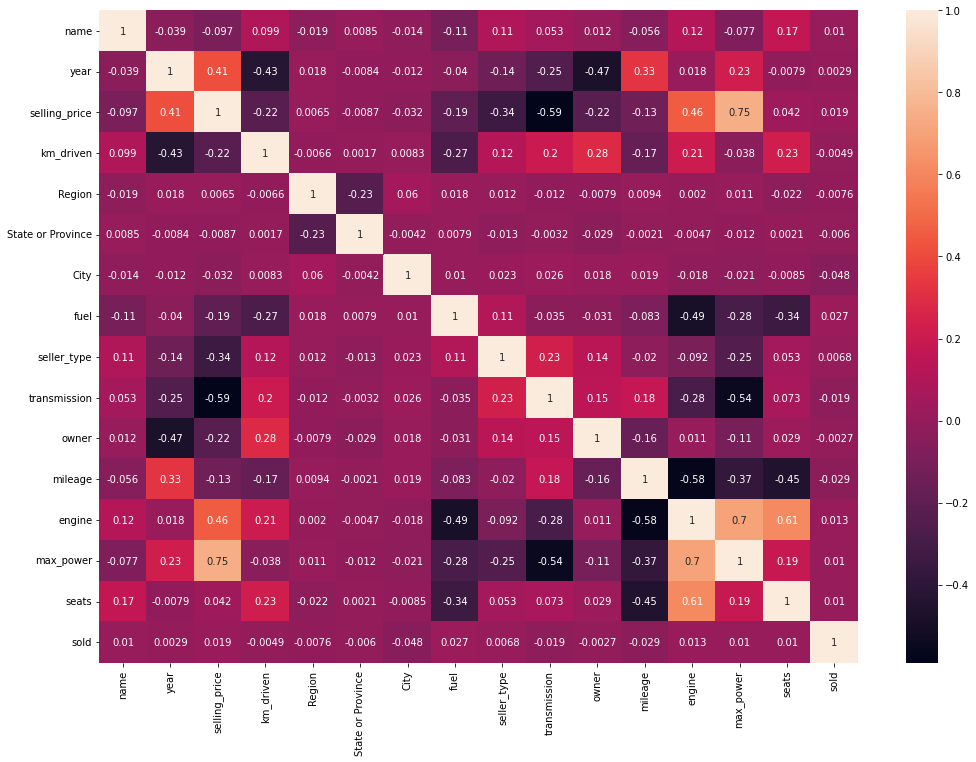

In [ ]:
# correlation of the columns
# heatmap
fig, axes = plt.subplots(figsize = (17,12))
sns.heatmap(data.corr(), annot = True);



*  we can see that the price of the vehicle is highly correlated to the engine power. However, I will not be making changes on these columns since they are important in the modelling stages.


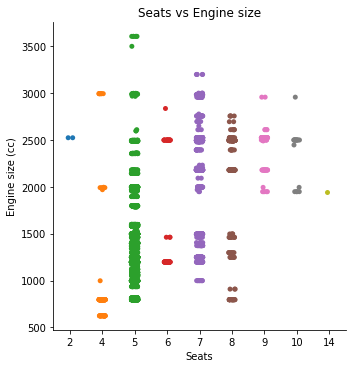

In [ ]:
# Relationship between engine size and seats. (has a high correlation in the heatmap)
p = sns.catplot(x='seats', y='engine', data=data);
p.set(xlabel = "Seats", ylabel = "Engine size (cc)", title = 'Seats vs Engine size');
# There is no clear relationship between the number of seats and the engine size.
# However, cars with 5 seats were the most and thus there was a wide range in the engine capacity which has contributed to the high correlation.

* There is no clear relationship between the number of seats and the engine size.
However, cars with 5 seats were the most and thus there was a wide range in the engine capacity which has contributed to the high correlation.

**3.Multivariate analysis**

**LDA**

In [ ]:
x = data.drop(columns =['sold'])
y = data['sold']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_ = lda.fit(x, y)
    
def sign(x):
  if x > 0:
    return 'positive'
  else:
    return 'negative'

abs_coeff = pd.DataFrame(pd.DataFrame(index=x.columns.values, data=lda_.coef_[0])[0].apply( lambda x: abs(x)))
abs_coeff['sign'] = pd.DataFrame(index=x.columns.values, data=lda_.coef_[0])[0].apply( lambda x: sign(x))
abs_coeff.sort_values(by=0, ascending = False)

,0,sign
fuel,8.503166e-02,positive
seller_type,5.955559e-02,positive
transmission,4.482188e-02,negative
Region,1.396505e-02,negative
seats,1.118210e-02,positive
mileage,9.284219e-03,negative
name,3.203756e-03,positive
year,1.915660e-03,positive
max_power,1.692673e-03,negative
State or Province,1.283549e-03,negative


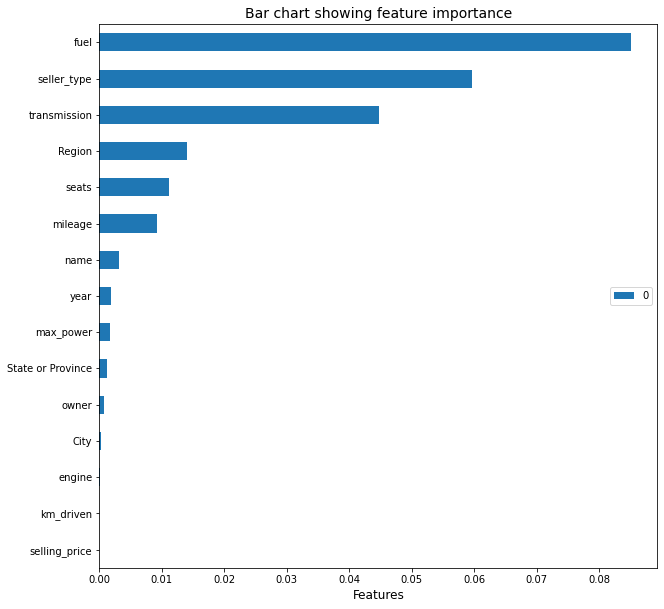

In [ ]:
df = abs_coeff.sort_values(by = 0, ascending = True)
df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

# **DATA MODELLING**

**Class imbalance**

In [ ]:
# separating features and target
# using the most important features from LDA.
x = data[['fuel','seller_type','transmission']]
y = data['sold']

In [ ]:
# Splitting the data to train and test.
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**SMOTE**

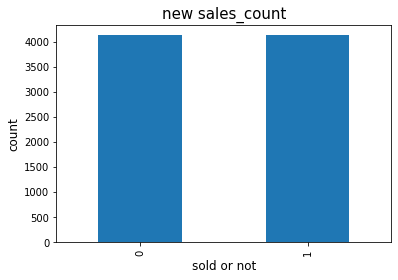

In [ ]:
# Using SMOTE to correct the class imbalance.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)

# Checking for class imbalance
y_res.value_counts().plot(kind = 'bar')
plt.title('new sales_count', size = 15)
plt.ylabel('count', size = 12)
plt.xlabel('sold or not', size = 12);
# Class imbalance has been rectified.

###**1.Logistic Regression Approach**

This will be the base line model.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Logreg = LogisticRegression()
Logreg.fit(x_res, y_res)
y_res_pred = Logreg.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))
# There has been an improvement.
# There are 933 true positives, 263 false positives 
# There are 849 false negatives and 327 false positives, this is an improvement from the logistic regression without treating class imbalance.
# There has also been an improvement in the f-1 score of the 'no-sales'

[[979 803]
 [329 261]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63      1782
           1       0.25      0.44      0.32       590

    accuracy                           0.52      2372
   macro avg       0.50      0.50      0.47      2372
weighted avg       0.62      0.52      0.55      2372



In [ ]:
# Hyper-parameter Tuning.
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10, 1000,2500, 5000]
    }
]
search = GridSearchCV(Logreg, param_grid = param_grid, scoring='precision')
search.fit(x_res,y_res)
print(search.best_params_)

{'C': 0.615848211066026, 'max_iter': 10, 'penalty': 'none', 'solver': 'sag'}


In [ ]:
# Logistic regression after hyper-parameter
Logreg = LogisticRegression(C = 0.615848211066026 , max_iter = 10, penalty = 'none', solver = 'sag')
Logreg.fit(x_res, y_res)
y_res_pred = Logreg.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[987 795]
 [331 259]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.64      1782
           1       0.25      0.44      0.32       590

    accuracy                           0.53      2372
   macro avg       0.50      0.50      0.48      2372
weighted avg       0.62      0.53      0.56      2372



The **precision** using **Logistic regression** approach for cars not sold :-

**Before** hyper-parameter tuning:  **0.75**(not sold) and **0.25**(sold)

**After** hyper-Parameter tuning: **0.75**(not sold) and **0.27**(sold)



*   The precision score for the first  remained the same for group 0.
*   However, there was an improvement in the precision for group 1.
*   This is the baseline model.

###**2.Naive Bayes**


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(x_res, y_res)
y_res_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[1365  417]
 [ 441  149]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1782
           1       0.26      0.25      0.26       590

    accuracy                           0.64      2372
   macro avg       0.51      0.51      0.51      2372
weighted avg       0.63      0.64      0.64      2372



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'var_smoothing': np.logspace(0,-9, num=100)

}
search = GridSearchCV(estimator = model, param_grid= param_grid, scoring='precision')
search.fit(x_res,y_res)
print(search.best_params_)

{'var_smoothing': 0.23101297000831597}


In [ ]:
model = GaussianNB(var_smoothing = 0.23101297000831597)
model.fit(x_res, y_res)
y_res_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[1461  321]
 [ 471  119]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1782
           1       0.27      0.20      0.23       590

    accuracy                           0.67      2372
   macro avg       0.51      0.51      0.51      2372
weighted avg       0.64      0.67      0.65      2372



The ***precision*** using ***Naive Bayes*** approach for cars not sold :-

***Before*** hyper-parameter tuning:  **0.75**(not sold) and **0.25**(sold)

***After*** hyper-Parameter tuning: **0.75**(not sold) and **0.25**(sold)






*   There was however an increase in the accuracy after tuning.
*   This model did however not perform better than baseline model.






###**3.Random Forest Approach**




In [ ]:
# Default Random Forest.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_res, y_res)
y_res_pred = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[926 856]
 [296 294]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1782
           1       0.26      0.50      0.34       590

    accuracy                           0.51      2372
   macro avg       0.51      0.51      0.48      2372
weighted avg       0.63      0.51      0.55      2372



In [ ]:
# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
search = GridSearchCV(estimator=rf,param_grid=parameters,scoring='f1')
search.fit(x_res,y_res)
print(search.best_params_)

In [ ]:
# Random Forest after hyper-parameter tuning 
rf = RandomForestClassifier(n_estimators = 50, max_depth = 4, min_samples_split = 5)
rf.fit(x_res, y_res)
y_res_pred = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[926 856]
 [296 294]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1782
           1       0.26      0.50      0.34       590

    accuracy                           0.51      2372
   macro avg       0.51      0.51      0.48      2372
weighted avg       0.63      0.51      0.55      2372



The ***precision*** using ***Random Forest*** approach for cars not sold :-

***Before*** hyper-parameter tuning:  **0.75**(not sold) and **0.25**(sold)

***After*** hyper-Parameter tuning: **0.76**(not sold) and **0.26**(sold)


1.   There was an improvement after hyper-parameter tuning.
2.   This model also performed better than the base line model and it is better than Naive Bayes.




##**4.KNN Approach**

In [ ]:
# Standardising the initial train_test_split.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Re-sampling the data.
x_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
# Performing KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier = KNeighborsClassifier()
classifier.fit(x_res, y_res)

y_res_pred = classifier.predict(x_test)

print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[1782    0]
 [ 590    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1782
           1       0.00      0.00      0.00       590

    accuracy                           0.75      2372
   macro avg       0.38      0.50      0.43      2372
weighted avg       0.56      0.75      0.64      2372



In [ ]:
# Hyper-parameter Tuning.
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_neighbors' : [1,20,2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
search = GridSearchCV(classifier, param_grid = param_grid, scoring='f1')
search.fit(x_res,y_res)
print(search.best_params_)

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
# KNN after hyper-parameter tuning.
classifier = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 1, weights = 'uniform')
classifier.fit(x_res, y_res)
y_res_pred = classifier.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[921 861]
 [296 294]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.61      1782
           1       0.25      0.50      0.34       590

    accuracy                           0.51      2372
   macro avg       0.51      0.51      0.48      2372
weighted avg       0.63      0.51      0.55      2372



The ***precision*** using ***KNN*** approach for both categories (sold and not sold cars) :-

***Before*** hyper-parameter tuning:  ***0.75***(not sold) and ***0.28***(sold)

***After*** hyper-Parameter tuning: ***0.76***(not sold) and ***0.25***(sold)



*   There was an increase after hyper_parameter tuning.
*   It however did not peform better than random forest 


##**5.SVM Approach**

In [ ]:
# Standardising the initial train_test_split.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Re-sampling the data.
x_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
# Default SVM - with default hyper-parameters.
from sklearn import metrics 
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid', C = 0.1, gamma = 0.1)
svc.fit(x_res,y_res)

y_res_pred = svc.predict(x_test)

print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[1496  286]
 [ 499   91]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1782
           1       0.24      0.15      0.19       590

    accuracy                           0.67      2372
   macro avg       0.50      0.50      0.49      2372
weighted avg       0.62      0.67      0.64      2372



In [ ]:
# Hyper-parameter Tuning.
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel' : ['linear', 'RBF', 'poly','sigmoid'],
              'C': [0, 0.05, 0.1, 0.5, 1, 5, 10],
              'degree' : [2,3,4,5,6],
              'gamma': [0.001, 0.01, 0.1, 1, 10]
              }
search = GridSearchCV(svc, param_grid = param_grid, scoring= 'precision')
search.fit(x_res,y_res)
print(search.best_params_)

In [ ]:
# SVM after hyper-parameter tuning 
svc = SVC(kernel = 'linear', C = 0.1, gamma = 0.1, degree = 2)
svc.fit(x_res,y_res)
y_res_pred = svc.predict(x_test)
print(metrics.confusion_matrix(y_test, y_res_pred))
print(metrics.classification_report(y_test, y_res_pred))

[[995 787]
 [325 265]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      1782
           1       0.25      0.45      0.32       590

    accuracy                           0.53      2372
   macro avg       0.50      0.50      0.48      2372
weighted avg       0.63      0.53      0.56      2372



The ***precision*** using ***SVM*** approach for cars not sold :-

***Before*** hyper-parameter tuning:  ***0.75***(not sold) and ***0.24***(sold)

***After*** hyper-Parameter tuning: ***0.75***(not sold) and ***0.25***(sold)

There was an improvement after hyper-parameter tuning.

*   There was an improvement after hyper-parameter tuning.
*   However, this model did not perform better than the baseline model.





#**Conclusion and Recommendation**

**Conclusion**

The main objective 'Creating a model that predicts if a car dealer will be able to sell a car or not' was achieved.



*   The best model was the Random Forest after tuning with parameters {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}. It had the best precision score of 0.76 of the 'not sold' class.


*   The main features used to model the data are 'fuel','seller_type' and 'transmission', which are the main features after doing feature selection.
*   The relationship between the sale of a car and other predictor variables investigated is shown in the data exploratory analysis.






